In [1]:
import os

# move up one directory
os.chdir("..")

print(os.getcwd())

/home/bram/codes/nkss


In [2]:
import numpy as np

from nkss.examples.transistorbooster import TransistorBooster
from nkss.utils import generate_ascending_sine, generate_sine_sweep
import matplotlib.pyplot as plt

In [3]:
sr = 44100
n_sec = 0.1

freq = 100

max_amp = 6

transistor = TransistorBooster(sample_rate=sr)


In [4]:
transistor.K.shape

(2, 2)

In [5]:
transistor.converter_matrix.shape

(2, 2)

100%|██████████| 4410/4410 [00:01<00:00, 2227.01it/s]


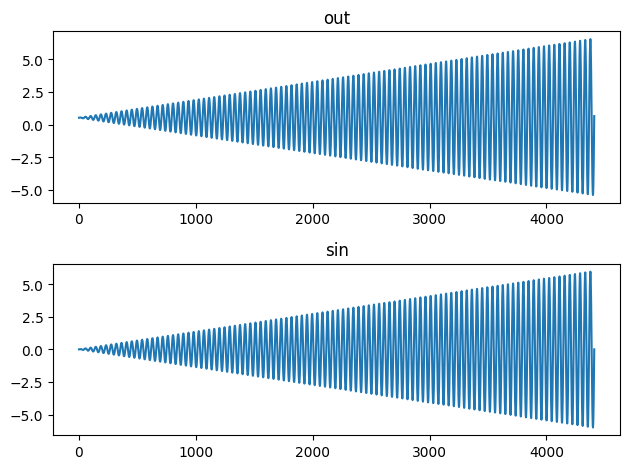

In [6]:
transistor.calc_init_values(
    un=np.array([
        [0],
        [9]]),
    xnm1=np.array([
        [0.6e-9],
        [0.6e-9]]),
    vn=np.array([
        [-0.7],
        [-1.4]]))

num_samples = int(sr * n_sec)
asc_sine = generate_ascending_sine(stop_amp=max_amp, sample_rate=sr)

out = transistor.process_block(input_samples=asc_sine)

plt.subplot(2, 1, 1)
plt.plot(out)
plt.title('out')

plt.subplot(2, 1, 2)
plt.plot(asc_sine)
plt.title('sin')

plt.tight_layout()
plt.show()
